In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import beta
from scipy.ndimage.interpolation import shift
import seaborn as sns
import scipy.stats as ss

In [2]:
betaf =1.9
numplayers = 64
rounds = 1000
numLiars = 14

trueVals = np.random.uniform(0, 1, (numplayers, rounds))
declaredVals = np.array(trueVals, copy=True)

liarsPos = np.full(numplayers, False)
liarsPos[:numLiars] = True
print(liarsPos)
np.random.shuffle(liarsPos)
print(liarsPos)

norm = stats.distributions.beta(betaf, 1)
declaredVals[liarsPos, :] = norm.ppf(trueVals[liarsPos, :])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
[False False False False False False False False False False  True False
 False  True False False False False False False False False False False
 False False False False  True  True False False False  True False False
 False  True False False False False False False False  True False  True
  True False  True  True  True False False False False False False False
 False False  True  True]


[ 0  1  2  3  4  5  6  7  8  9 11 12 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 30 31 32 34 35 36 38 39 40 41 42 43 44 46 49 53 54 55 56 57 58 59
 60 61]


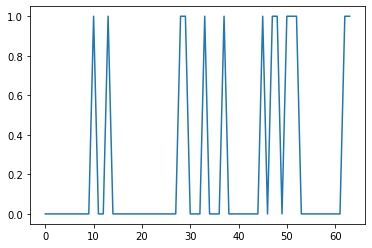

In [3]:
Tpos = np.where(liarsPos == False)[0]
print(Tpos)
plt.plot(liarsPos)

In [4]:
Fpos = np.where(liarsPos == True)[0]
print(Fpos)

[10 13 28 29 33 37 45 47 48 50 51 52 62 63]


0


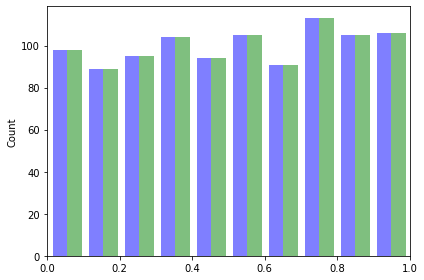

In [5]:
firstHonest = Tpos[0]
print(firstHonest)
#plots the histogram
colors = ['b','g']
labes =['True','Declared']
fig, ax1 = plt.subplots()
ax1.hist([trueVals[firstHonest,:],declaredVals[firstHonest,:]],alpha=0.5,color=colors)
ax1.set_xlim(0,1)
ax1.set_ylabel("Count")
plt.tight_layout()
plt.show()

10


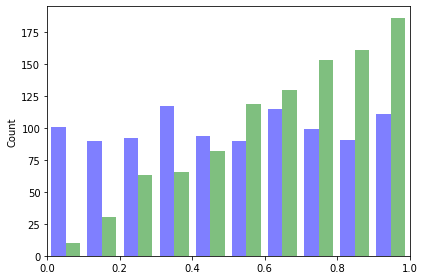

In [6]:
firstLiar = Fpos[0]
print(firstLiar)
#plots the histogram
colors = ['b','g']
labes =['True','Declared']
fig, ax1 = plt.subplots()
ax1.hist([trueVals[firstLiar,:],declaredVals[firstLiar,:]],alpha=0.5,color=colors)
ax1.set_xlim(0,1)
ax1.set_ylabel("Count")
plt.tight_layout()
plt.show()

In [7]:
ss.kstest(trueVals[firstHonest, :], 'uniform')

KstestResult(statistic=0.04026289363082369, pvalue=0.07605075078301915)

In [8]:
ss.kstest(trueVals[firstLiar, :], 'uniform')

KstestResult(statistic=0.021108197859857375, pvalue=0.7644298250595465)